In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv("wdbc.csv", header=None)

df_raw

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
y = pd.get_dummies(df_raw.iloc[:,1:2])

y = torch.Tensor(y.values)

y

tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [0., 1.],
        [1., 0.]])

In [4]:
x = df_raw.iloc[:,2:]

x = (x - x.min()) / (x.max() - x.min())

x = torch.Tensor(x.values)

x

tensor([[0.5210, 0.0227, 0.5460,  ..., 0.9120, 0.5985, 0.4189],
        [0.6431, 0.2726, 0.6158,  ..., 0.6392, 0.2336, 0.2229],
        [0.6015, 0.3903, 0.5957,  ..., 0.8351, 0.4037, 0.2134],
        ...,
        [0.4553, 0.6212, 0.4458,  ..., 0.4873, 0.1287, 0.1519],
        [0.6446, 0.6635, 0.6655,  ..., 0.9107, 0.4971, 0.4523],
        [0.0369, 0.5015, 0.0285,  ..., 0.0000, 0.2574, 0.1007]])

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        
        self.hidden_layer_1 = nn.Linear(self.in_dim, 20) # input to first hidden layer
        self.hidden_layer_2 = nn.Linear(20, 10)
        
        self.multiple_layers = nn.Sequential(
            nn.Linear(10, 10),
            nn.Sigmoid(),
            nn.Linear(10, 10),
            nn.Sigmoid(),
            nn.Linear(10, 10),
            nn.Sigmoid(),
            nn.Linear(10, 10),
            nn.Sigmoid(),
        )
        
        self.output_layer = nn.Linear(10, self.out_dim)
        self.activation = nn.Sigmoid()
    
    def forward(self, x):
        x = self.hidden_layer_1(x)
        x = self.activation(x)
        
        x = self.hidden_layer_2(x)
        x = self.activation(x)
        
        x = self.multiple_layers(x)
        
        y = self.output_layer(x)
        y = self.activation(y)
        
        return y

In [6]:
model = NeuralNetwork(30, 2)

# Test structure of model
predictions = model.forward(x)

predictions

tensor([[0.5621, 0.5071],
        [0.5621, 0.5071],
        [0.5621, 0.5071],
        ...,
        [0.5621, 0.5071],
        [0.5621, 0.5071],
        [0.5621, 0.5071]], grad_fn=<SigmoidBackward0>)

In [7]:
learning_rate = 0.00001
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
batch_size = 5

In [8]:
# Custom dataset to treat how the model picks an x, y combination from the dataset
class MyCustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    # Requires you to return data as a pair of _x, _y
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [9]:
# Define the training process
# Each call of the train function == 1 Epoch
def train_fn(loader, model, optimizer, loss_fn, batch_size):
    loop = tqdm(loader)
    
    count = 0
    ave_loss = 0.00
    
    # Loop per batch
    for batch_idx, (data, targets) in enumerate(loop):
        predictions = model.forward(data)
        
        loss = loss_fn(predictions, targets)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        loop.set_postfix(loss=loss.item())
        
        ave_loss += loss.item()
        count += 1
        
    ave_loss = ave_loss / count
    
    return ave_loss

# Dataloader is in charge of:
# - partitioning data into batches
# - optionally shuffling the data
# - run the optimizer against a partition defined by this loader
custom_dataset = MyCustomDataset(x=x, y=y)

train_loader = DataLoader(
    custom_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

epochs = 100
losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    ave_loss = train_fn(
        train_loader,
        model,
        optimizer,
        loss_fn,
        batch_size
    )
    
    losses.append(ave_loss)
    
    print("Ave Loss: {}".format(ave_loss))
    
    state = { 'state_dict': model.state_dict() }

    torch.save(state, "model.pth")

Epoch: 0


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 503.36it/s, loss=0.266]


Ave Loss: 0.24495025188253636
Epoch: 1


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 505.93it/s, loss=0.266]


Ave Loss: 0.2447872225914085
Epoch: 2


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 450.75it/s, loss=0.267]


Ave Loss: 0.2446347796603253
Epoch: 3


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 416.50it/s, loss=0.267]


Ave Loss: 0.24448488051431222
Epoch: 4


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 444.03it/s, loss=0.267]


Ave Loss: 0.24433731274646625
Epoch: 5


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 465.92it/s, loss=0.268]


Ave Loss: 0.24419196054600834
Epoch: 6


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 515.20it/s, loss=0.268]


Ave Loss: 0.244048748230725
Epoch: 7


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 409.60it/s, loss=0.268]


Ave Loss: 0.24390762077088943
Epoch: 8


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 458.55it/s, loss=0.269]


Ave Loss: 0.24376852418247022
Epoch: 9


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 452.03it/s, loss=0.269]

Ave Loss: 0.24363141245486444


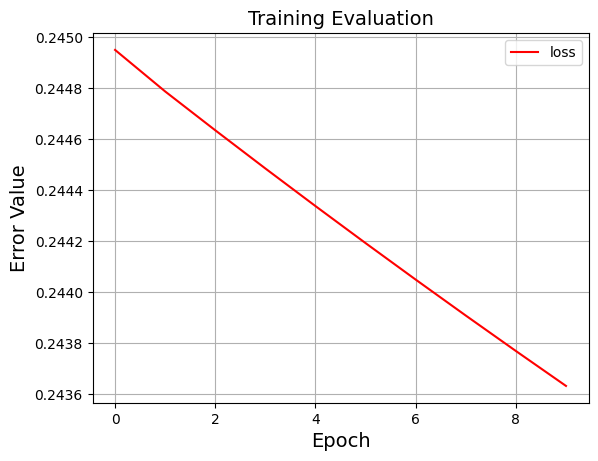

In [10]:
plt.plot(losses, label='loss', color='red')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Error Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()